# Bepaling van soortelijke warmte van water


# Introductie

Water heeft een enorme buffercapaciteit: je moet veel energie toevoegen om de temperatuur van water een graad te verwarmen. In dit practicum gaan we de soortelijke warmte van water bepalen door een bekende hoeveelheid water te verwarmen met een bekende hoeveelheid energie, en de temperatuurstijging te meten.

# Theorie

Voor het systeem van het water met de weerstand geldt dat het verschil in interne energie U berekend kan worden met: $\Delta U = m c \Delta T$. Als wordt aangenomen dat het een geïsoleerd systeem is, is het verschil in interne energie gelijk aan de elektrische energie van de weerstand, namelijk: $\Delta U = P t = U I t$. Hieruit volgt dat de soortelijke warmte van water gelijk is aan: $c = \frac{U I t}{m \Delta T}$. 

# Methode en materialen

## Ontwerp
Een waterbad met bekende massa aan water wordt verwarmd met een elektrisch verwarmingselement dat een bekende hoeveelheid energie levert.
De temperatuur van het water wordt gemeten met een temperatuursensor.
Door de temperatuurstijging als functie van de tijd te meten kan de soortelijke warmte van water worden berekend.


## Materialen
Hieronder staat de lijst van benodigde materialen bij deze proef:
- Maatbeker
- Weegschaal
- Water
- Elektrisch verwarmingselement ($10 \mathrm{\Omega}$, $10 \mathrm{W}$)
- Voedingsbron 
- Thermometer of temperatuursensor
- Stopwatch of timer

```{figure} figures/cwater_setup.jpg
:width: 70%

Een schematische weergave van de opstelling
```

## Procedure
```{exercise}
1. Beschrijf de procedure die nodig is om de soortelijke warmte van water te bepalen.
2. Geef jouw beschrijving van de procedure aan een ander team, zij verzamelen voor jou de data op basis van de gegevens.
3. Voer het experiment van een ander team uit op basis van hun beschrijving.
4. Analyseer de data die het andere groepje voor jou heeft verzameld.
```
1. Bepaal de massa van de maatbeker met de weegschaal. Vul de maatbeker met ongeveer 300mL water en bepaal opnieuw de massa van de maatbeker met het water. 
2. Doe het elektrisch verwarmingselement, zonder aan te zetten, en de thermometer in het water. Zet de roerder aan op stand 7. Wacht totdat de thermometer in thermisch evenwicht is met het water. Lees de temperatuur $T_1$ af op de thermometer.
3. Sluit de weerstand aan op de voedingsbron zonder de voedingsbron aan te zetten. Stel de spanning in op U = 12V. Op het moment dat de voedingsbron wordt aangezet, wordt de stopwatch ingedrukt. Noteer de waarden van $V$ en $I$. 
4. Als de temperatuur van het water 0,2 °C is gestegen, wordt de temperatuur $T_2$ afgelezen en de tijd $t$ van de stopwatch genoteerd. Laat de stopwatch lopen en noteer enkel de tijd. Blijf dit herhalen tot de temperatuur niet meer stijgt of het langer dan 5 minuten duurt.  
5. Bepaal opnieuw de massa van het overgebleven water met de weegschaal. 

## Veiligheid
We maken gebruik van een $10 \mathrm{\Omega}$, $10 \mathrm{W}$ weerstand.
Deze wordt snel heet.
De bronspanning mag dan ook alleen aan wanneer de weerstand in het water zit.
Raak de weerstand niet aan tijdens het experiment.
Omdat de weerstand in het water zit, kunnen we wel het elektrisch vermogen hoger zetten zonder dat de weerstand oververhit raakt.
Het maximaal vermogen mag $40 \mathrm{W}$ zijn.
Daarbij moet de roerder wel aanstaan om de warmte goed te verdelen.

## Data analyse
Geef kort de data-analysemethode weer.

# Resultaten


In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit 

#Gegevens uit experiment
m = (569.3-189.7)*1e-3  #kg
U = 11.5         #V
I = 1.20         #A
T1 = 20.4 +273.15                                       #Kelvin
T2 = np.array([ 20.4, 20.6, 20.8, 21, 21.2, 21.4, 21.6, 21.8, 22.0, 22.2, 22.4, 22.6, 22.8]) + 273.15       #Kelvin
t = np.array([ 0, 30, 60, 81, 105, 130, 154, 178, 203, 229, 254, 279, 305])        #seconden
dT = T2 - T1  #Temperatuurverandering in Kelvin

De soortelijke warmte van water is: 4640.0 ± 20.0 J/(kg·K)


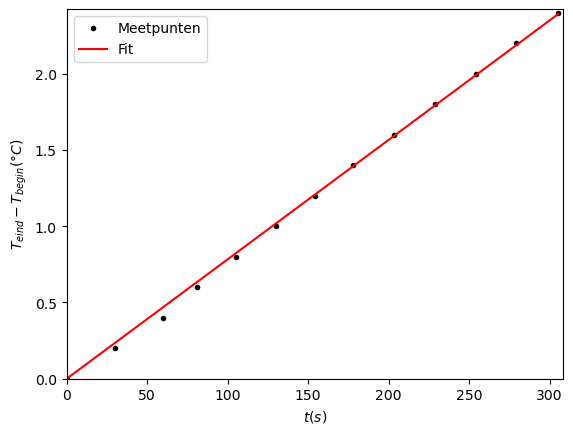

In [38]:
# Curve_fit maken
def function_fit(t, c):
    return (U * I * t) / (m * c)
val, cov = curve_fit(function_fit, t, dT)
print("De soortelijke warmte van water is:", round(val[0],-1), '\u00B1', round(np.sqrt(cov[0,0]),-1), "J/(kg·K)")
c_water = val[0] 
u_c_water = np.sqrt(cov[0,0])

t_fit=np.linspace(min(t), max(t), 100)
dT_fit=function_fit(t_fit, *val)

#Grafiek van data met curve fit
plt.figure()
plt.xlabel('$t(s)$')
plt.ylabel("$T_{eind}-T_{begin}(°C)$")
plt.xlim(0,1.01*max(t))
plt.ylim(0.9*min(dT),1.01*max(dT))
plt.plot(t, dT, 'k.', label='Meetpunten')
plt.plot(t_fit, dT_fit, 'r-', label='Fit')
plt.legend()
plt.show()

# Discussie en conclusie

De gevonden waarde van de soortelijke warmte van water is 4640 +/- 20 J/(kgK). Dit is hoger dan de te verwachten waarde van 4186 J/(kgK). Tijdens vervolgonderzoek zou de spanning over en de stroom door het elektrisch verwarmingselement kunnen worden verhoogd en het volume van het water kunnen worden verkleind, zodat de meting over een groter bereik van temperatuurverschillen kan worden uitgevoerd. 